In [218]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

# Read in all datasets
owner_dataset = pd.read_csv('data/owner_dataset.csv')
race_ethnicity_dataset = pd.read_csv('data/race-ethnicity-dataset.csv')
states_dataset = pd.read_csv('data/states_dataset.csv')
summary_dataset = pd.read_csv('data/summary_dataset.csv')
tech_dataset = pd.read_csv('data/tech_dataset.csv')

# Race Visualizations

/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928/2131755623.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Black or African American alone'] = 'Black or African American'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928/2131755623.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'American Indian and Alaska Native alone'] = 'American Indian and Alaska Native'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928

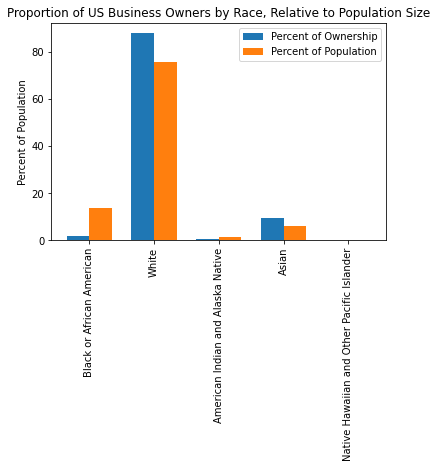

In [219]:
# Topic 1: Business Ownership

# From Census API

# Get only the wanted part of data
re_only_data = owner_dataset.copy()
re_only_data = re_only_data[re_only_data['Industry'] == 'Total for all sectors']
re_only_data = re_only_data[re_only_data['OwnerEthnicity'] == 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnerVetStatus'] == 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnedSince'] == 'Total reporting']
re_only_data = re_only_data[re_only_data['Year'] == 2018]
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'Minority']
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'Nonminority']

# Condense working dataset
re_only_data = re_only_data[['OwnerRace', 'OwnerCt']]

# Gives three values so take the first (b/c it is the total of the other two)
re_only_data = re_only_data[0::3]

# From Census table

# Get only wanted part of data
re_only_data_dem = race_ethnicity_dataset.copy()

# Remove unwanted rows
re_only_data_dem = re_only_data_dem[re_only_data_dem['RaceOrEthnicGroup'] != 'Two or More Races']
re_only_data_dem = re_only_data_dem[re_only_data_dem['RaceOrEthnicGroup'] != 'Hispanic or Latino']
re_only_data_dem = re_only_data_dem[re_only_data_dem['RaceOrEthnicGroup'] != 'White alone, not Hispanic or Latino']

# Get tags to match up
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'White alone'] = 'White'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Black or African American alone'] = 'Black or African American'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'American Indian and Alaska Native alone'] = 'American Indian and Alaska Native'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Asian alone'] = 'Asian'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Native Hawaiian and Other Pacific Islander alone'] = 'Native Hawaiian and Other Pacific Islander'

# Rename to give consistent header to merger on
re_only_data_dem = re_only_data_dem.rename(columns={'RaceOrEthnicGroup': 'OwnerRace'})

# Merge data together
re_only = re_only_data.merge(re_only_data_dem, how='inner', on='OwnerRace')
re_only = re_only.rename(columns={'Value': 'PopPerc'})

# Get percent ownership
total_owners = re_only['OwnerCt'].sum()
re_only['OwnerPerc'] = re_only['OwnerCt'] / total_owners * 100

# Get owner augmentation
re_only['OwnerAugmentation'] = re_only['OwnerPerc'] / re_only['PopPerc']

# Create two graphics: (1) comparison of ownership to population percentage; and (2) ownership augmentation
width = 0.35
fig, ax = plt.subplots()
labels = np.arange(len(re_only['OwnerRace']))
p1 = ax.bar(labels - width/2, re_only['OwnerPerc'], width, label='Percent of Ownership')
p2 = ax.bar(labels + width/2, re_only['PopPerc'], width, label='Percent of Population')
ax.set_xticks(labels, labels=(list(re_only['OwnerRace'])), rotation=90)
ax.set_title('Proportion of US Business Owners by Race, Relative to Population Size')
ax.set_ylabel('Percent of Population')
ax.legend()


Text(0, 0.5, 'Ownership Augmentation')

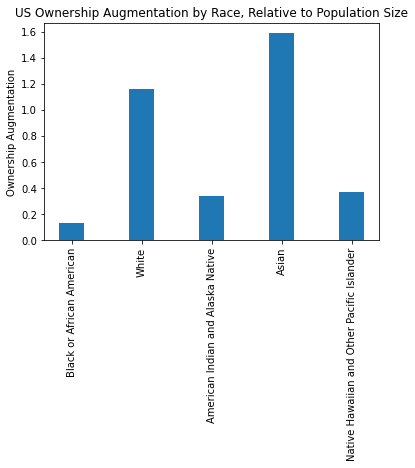

In [220]:
width = 0.35
fig, ax = plt.subplots()
labels = np.arange(len(re_only['OwnerRace']))
p3 = ax.bar(labels, re_only['OwnerAugmentation'], width, label='Percent of Ownership')
ax.set_xticks(labels, labels=(list(re_only['OwnerRace'])), rotation=90)
ax.set_title('US Ownership Augmentation by Race, Relative to Population Size')
ax.set_ylabel('Ownership Augmentation')

Text(0, 0.5, 'Hundred-Thousands of Employees')

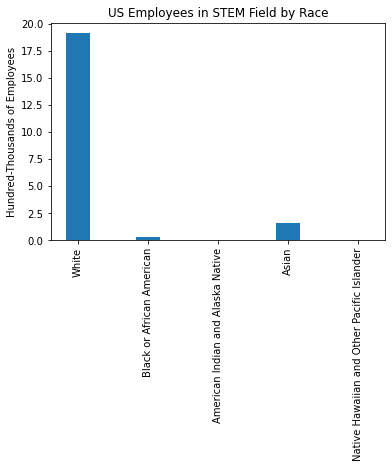

In [221]:
# Topic 2: (1) Participation of race in STEM and (2) how many people it would take to equitably fill these positions

# Get only the wanted part of data
race_tech = summary_dataset.copy()
race_tech = race_tech[race_tech['Industry'] == 'Professional, scientific, and technical services']
race_tech = race_tech[race_tech['Ethnicity'] == 'Total']
race_tech = race_tech[race_tech['Race'] != 'Total']
race_tech = race_tech[race_tech['Race'] != 'Equally minority/nonminority']
race_tech = race_tech[race_tech['Race'] != 'Minority']
race_tech = race_tech[race_tech['Race'] != 'Nonminority']
race_tech = race_tech[race_tech['VetStatus'] == 'Total']
race_tech = race_tech[race_tech['SpousalOwnershipSharing'] == 'Total reporting']
race_tech = race_tech[race_tech['Sex'] == 'Total']

# Get only necessary categories
race_tech = race_tech[['Race', 'EmployeeCt']]

# Make a bar chart of percentiles of race
fig, ax = plt.subplots()
labels = np.arange(len(race_tech['Race']))
p4 = ax.bar(race_tech['Race'], race_tech['EmployeeCt']/100000, width)
ax.set_xticks(labels, labels=(list(race_tech['Race'])), rotation=90)
ax.set_title('US Employees in STEM Field by Race')
ax.set_ylabel('Hundred-Thousands of Employees')

/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928/1471076225.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_jobs = new_jobs[race_tech['Race'] != 'Asian']
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928/1471076225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_jobs['Label'] = f'{new_jobs["Race"]} ({new_jobs["MakeupEmp"]})'


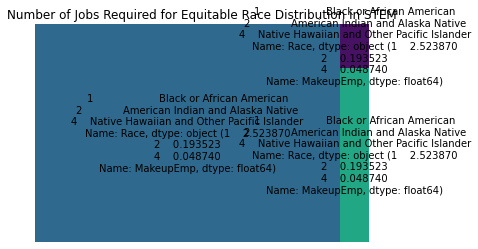

In [222]:
# Merge data with population data
race_tech_dem = re_only_data_dem.copy()
race_tech_dem = race_tech_dem.rename(columns={'OwnerRace': 'Race'})
race_tech = race_tech.merge(race_tech_dem, how='inner', on='Race')
race_tech = race_tech.rename(columns={'Value': 'PopPerc'})
tech_total = race_tech['EmployeeCt'].sum()
race_tech['MakeupEmp'] = ((race_tech['PopPerc'] / 100) - (race_tech['EmployeeCt'] / tech_total)) * tech_total / 100000

# Make a bar chart of percentiles of race
#new_jobs = race_tech[race_tech['Race'] != 'White']
#new_jobs = new_jobs[race_tech['Race'] != 'Asian']
#squarify.plot(sizes=new_jobs['MakeupEmp'], label=new_jobs['Label'], alpha=1 )
#plt.axis('off')
#plt.title('Number of Jobs Required for Equitable Race Distribution in STEM')
#plt.show()
fig, ax = plt.subplots()
labels = np.arange(len(race_tech['Race']))
p5 = ax.bar(race_tech['Race'], race_tech['MakeupEmp'])
ax.set_xticks(labels, labels=(list(race_tech['Race'])), rotation=90)
ax.set_title('Employees Needed in Tech for Equitable Race Distribution')
ax.set_ylabel('Hundred-Thousands of Needed Employees')

Text(0, 0.5, 'Average Income (Thousand USD/Year)')

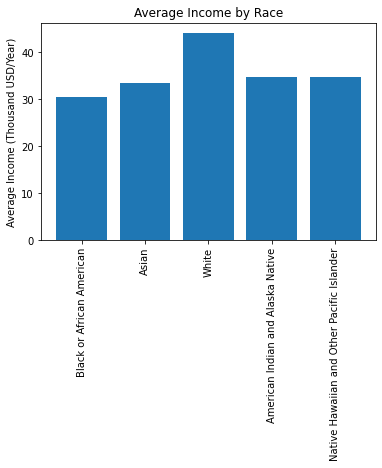

In [227]:
# Plot 3: Compare average income of different races and sexes

race_income = summary_dataset.copy()
race_income = race_income[race_income['Industry'] == 'Total for all sectors']
race_income = race_income[race_income['Ethnicity'] == 'Total']
race_income = race_income[race_income['Race'] != 'Total']
race_income = race_income[race_income['Race'] != 'Equally minority/nonminority']
race_income = race_income[race_income['Race'] != 'Minority']
race_income = race_income[race_income['Race'] != 'Nonminority']
race_income = race_income[race_income['VetStatus'] == 'Total']
race_income = race_income[race_income['SpousalOwnershipSharing'] == 'Total reporting']
race_income = race_income[race_income['Sex'] == 'Total']

# Get only necessary columns
race_income = race_income[['Race', 'EmployeeCt', 'AnnualPayrollInThousands']]
race_income['AvgSalary'] = race_income['AnnualPayrollInThousands'] / race_income['EmployeeCt']
fig, ax = plt.subplots()
labels = np.arange(len(race_income['Race']))
p6 = ax.bar(race_income['Race'], race_income['AvgSalary'])
ax.set_xticks(labels, labels=(list(race_income['Race'])), rotation=90)
ax.set_title('Average Income by Race')
ax.set_ylabel('Average Income (Thousand USD/Year)')

In [ ]:
#Percentage of businesses owned by women over the different “owned since” time periods
# Get only the wanted part of data
WomenOwned = owner_dataset.copy()
WomenOwned = WomenOwned[WomenOwned['OwnerEthnicity'] == 'All owners of respondent firms']
WomenOwned = WomenOwned[race_income['Industry'] == 'Total for all sectors']
WomenOwned = WomenOwned[WomenOwned['OwnerRace'] == 'All owners of respondent firms']
WomenOwned = WomenOwned[WomenOwned['OwnerVetStatus'] == 'All owners of respondent firms']
WomenOwned = WomenOwned[WomenOwned['Year'] == 2018]
WomenOwned = WomenOwned[WomenOwned['OwnerSex'] == 'Female']
#Creating graph
sns.lineplot(data=WomenOwned, x="OwnedSince", y="OwnerCtPercentage")

In [ ]:
#What percentage of owners are male/female in each industry?
# Get only the wanted part of data
datawanted = owner_dataset.copy()
datawanted = datawanted[datawanted['OwnerEthnicity'] == 'All owners of respondent firms']
datawanted = datawanted[datawanted['OwnerRace'] == 'All owners of respondent firms']
datawanted = datawanted[datawanted['OwnerVetStatus'] == 'All owners of respondent firms']
datawanted = datawanted[datawanted['OwnedSince'] == 'Total reporting']
datawanted = datawanted[datawanted['Year'] == 2018]
datawanted = datawanted[datawanted['OwnerSex'] != 'All owners of respondent firms']

# Get only necessary columns
datawanted = datawanted[['OwnerSex', 'Industry', 'OwnerCtPercentage']]

#Get Men and Women Data
womenData = datawanted[datawanted['OwnerSex'] == 'Female']
menData = datawanted[datawanted['OwnerSex'] == 'Male']

#Create figure
fig, ax = plt.subplots()
labels = np.arange(len(datawanted['Industry']))
WomenBar = ax.bar(womenData, datawanted['OwnerCtPercentage'], label = 'Women')
MenBar = ax.bar(menData, datawanted['OwnerCtPercentage'], label = 'Men')

#Setting Labels and things
ax.set_xticks(labels, labels=(list(datawanted['Industry'])))
ax.set_title('Percentages of Businesses Owned by Women and Men by Industry')
ax.set_ylabel('Percentage of Businesses Owned')

ax.bar_label(WomenBar)
ax.bar_label(MenBar)

In [ ]:
#What does the SpousalOwnershipsharing percentage variable look like across different industries? - In Summary Data
# Get only the wanted part of data
datawanted = summary_dataset.copy()
datawanted = datawanted[datawanted['Ethnicity'] == 'Total']
datawanted = datawanted[datawanted['Sex'] != 'Total']
datawanted = datawanted[datawanted['Race'] == 'Total']
datawanted = datawanted[datawanted['VetStatus'] == 'Total'] 
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'Total Reporting']
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'All firms']
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'Not Applicable']
datawanted = datawanted[datawanted['SpousalOwnershipSharing'] != 'Item not reported']
datawanted = datawanted[datawanted['OwnedSince'] == 'Total reporting']
datawanted = datawanted[datawanted['Year'] == 2018]

# Get only necessary columns
datawanted = datawanted[['SpousalOwnershipSharing', 'Industry', 'EmployerFirmCtPerc']]

#Get Men and Women Data
EquallyOperated = datawanted[datawanted['SpousalOwnershipSharing'] == 'Jointly owned and equally operated by spouses']
MaleSpouse = datawanted[datawanted['SpousalOwnershipSharing'] == 'Jointly owned but primarily operated by male spouse']
FemaleSpouse = datawanted[datawanted['SpousalOwnershipSharing'] == 'Jointly owned but primarily operated by female spouse']
NotJoint = datawanted[datawanted['SpousalOwnershipSharing'] == 'Not jointly owned by spouses']

#Create figure
fig, ax = plt.subplots()
labels = np.arange(len(datawanted['Industry']))
EqualBar = ax.bar(EquallyOperated, datawanted['EmployerFirmCtPerc'], label = 'Jointly owned and equally operated by spouses')
MaleBar = ax.bar(MaleSpouse, datawanted['EmployerFirmCtPerc'], label = 'Jointly owned but primarily operated by male spouse')
FemaleBar = ax.bar(FemaleSpouse, datawanted['EmployerFirmCtPerc'], label = 'Jointly owned but primarily operated by female spouse')
NoneBar = ax.bar(NotJoint, datawanted['EmployerFirmCtPerc'], label = 'Not jointly owned by spouses')

#Setting Labels and things
ax.set_xticks(labels, labels=(list(datawanted['Industry'])))
ax.set_title('How Spousal Ownership Sharing is Distributed Across Industries')
ax.set_ylabel('Percentage of Firms Owned')

ax.bar_label(EqualBar)
ax.bar_label(MaleBar)
ax.bar_label(FemaleBar)
ax.bar_label(NoneBar)